<a href="https://colab.research.google.com/github/habib-gm/Pan-Card-Tempering-Detection/blob/master/Pan_card_tampering_detection_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from skimage.metrics import structural_similarity
import imutils
import cv2 as cv
from PIL import Image
import requests

In [4]:
!mkdir pan_card_tampering
!mkdir pan_card_tampering/image

In [5]:
original = Image.open(requests.get('https://www.thestatesman.com/wp-content/uploads/2019/07/pan-card.jpg', stream = True).raw)
tampered = Image.open(requests.get('https://assets1.cleartax-cdn.com/s/img/20170526124335/Pan4.png', stream = True).raw)

In [6]:
# File Format of the source file
print('original image format : ', original.format)
print('tampered image format : ', tampered.format)

# The size, in pixels. The size is given as 2-tuple (width, height)
print('Original image size : ', original.size)
print('Tampered image size : ', tampered.size)


original image format :  JPEG
tampered image format :  PNG
Original image size :  (1200, 800)
Tampered image size :  (282, 179)


In [7]:
# resize the images 
original = original.resize((250, 160))
print(original.size)
original.save("pan_card_tampering/image/original.png") # saving the image as png

tampered = tampered.resize((250, 160))
print(tampered.size)
tampered.save("pan_card_tampering/image/tampered.png") #saving the image as png after resizing it with equal size with original one

(250, 160)
(250, 160)


In [ ]:
# tampered = Image.open('pan_card_tampering/image/tampered.png')


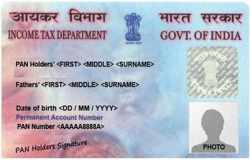

In [8]:
# display original image
original

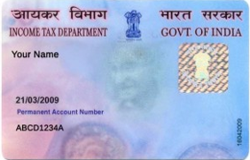

In [9]:
# display tampered image
tampered

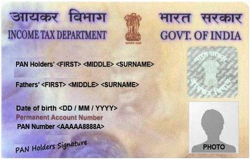

In [37]:
# load the images in cv2
original = cv.imread("pan_card_tampering/image/original.png")
tampered = cv.imread("pan_card_tampering/image/tampered.png")
Image.fromarray(original)
# original
# tampered

***Converting an image into grayscale using opencv. becouse in image processing many apps doesn't help us in identifying the important edges of the coloured images also coloured images are bit complex to understand by machine becouse they have 3 channel while grayscal has only 1 channel.***

In [42]:
# converting the images into gray
original_gray = cv.cvtColor(original, cv.COLOR_BGR2GRAY)
tampered_gray = cv.cvtColor(tampered, cv.COLOR_BGR2GRAY)
# Image.fromarray(original_gray)
# Image.fromarray(tampered_gray)


Structural Similarity index helps us to determine exactly where in terms of x,y coordindinates location, the image differences are.
Below, we are trying to find similarities between the original and tempered image. 
The lower the SSIM score is the lower the similarity.

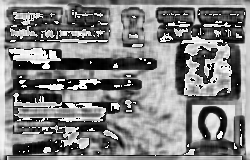

In [72]:
score, diff = structural_similarity(original_gray, tampered_gray, full = True)
diff = (diff*255).astype('uint8')
# Image.fromarray(diff)
print('SSIM {}'.format(score))

In [74]:
thresh = cv.threshold(diff, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
# Image.fromarray(thresh)
cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
len(cnts) #hoe many contours are found in the image
# print(cnts[40])

49

In [69]:
# loop over the contours
for c in cnts:
  # applying contours on image
  (x, y, w, h) = cv.boundingRect(c)
  cv.rectangle(original, (x,y), (x+w, y+h), (0,0,255), 2)
  cv.rectangle(tampered, (x,y), (x+w, y+h), (0,0,255), 2)
# Image.fromarray(original)
# Image.fromarray(tampered)

ORIGINAL FORMAT IMAGE


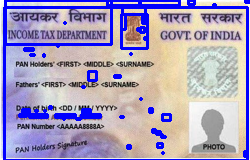

In [70]:
# display the original image with contour
print("ORIGINAL FORMAT IMAGE")
Image.fromarray(original)

TAMPERED IMAGE 


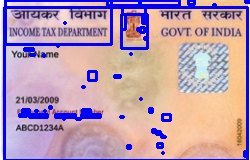

In [75]:
# display the tampered image contours
print("TAMPERED IMAGE ")
Image.fromarray(tampered)

DIFFRENT IMAGE


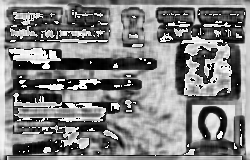

In [76]:
# display diffrence image with black
print("DIFFRENT IMAGE")
Image.fromarray(diff)

THRESH-HOLD IMAGE


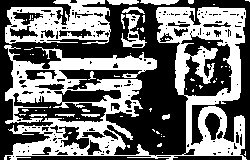

In [77]:
# print threshold image with white
print("THRESH-HOLD IMAGE")
Image.fromarray(thresh)

#SUMMARY

Finding out structural similarity of the image helped us in finding the diffrence or similarity in the shape of the images. Similarly, finding out the threshold and conotours based on those threshold for the images converted into grayscale binary also halped us in shape analysis and recognition.
As, our SSIM is ~31.2% we can say that the image user provided is fake or tempered.
finally we visualized the diffrence and similarities between the images using by displaying the images with contours, diffrence and threshold.
# SCOPE
This project can be used in diffrent organization where customers or users need to provide any kind of id in order to get themselves varified.
The organization can use this project to find out whether the ID is original or fake. Similarly this can be themselves verified. The organizations can use this project to find out whether the id is original or fake, Similaly this can be used for any type of id by just replacing original the original ID.


In [79]:
! git clone https://github.com/habib-gm/Pan-Card-Tempering-Detection.git

Cloning into 'Pan-Card-Tempering-Detection'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 12 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (12/12), done.


In [83]:
! pwd

/content


In [ ]:
! 